# Modeling with `scikit-learn`
<br>
<center>
<img src="images/fortune-teller.gif" alt="fortune-teller.gif" width="500" height="500">
</center>

## Applied Review

### `scikit-learn` in Python's Data Science Ecosystem

* Python has a lot of packages to meet different data science needs

* `scikit-learn`, abbreviated in Python as `sklearn`, is a general machine learning package

* Other statistics-oriented packages include `scipy` and `statsmodels`

## Machine Learning Overview

* `scikit-learn` is a package for **machine learning**

* You may hear this called modeling, predictive analytics, data mining, artifical intelligence, etc.

* But **machine learning** is a catch all term for these things

* Despite being broad, most machine learning methodologies and problems fit into two categories: **supervised learning** and **unsupervised learning**

### Supervised Learning

* Generally speaking, **supervised learning** problems are focused on predicting/estimating/labeling a truth

* Another way to think of this is *learning a function* -- given the inputs, attempt to predict/estimate/label the output

* Examples:
  * Estimating a customer's satisfaction with a product they haven't tried before
  * Predicting next month's sales
  * Predicting the outcome of a sporting event
  * Labeling whether a photo contains a cucumber or a zucchini

* All of these examples of supervised learning fit into two distinct categories: **regression** and **classification**

#### Regression

* **Regression** is focused on estimating/predicting a *continuous output*

<div class='question'>
    <strong>Question:</strong> Which of our examples are regression problems?
</div>

  * Estimating a customer's satisfaction with a product they haven't tried before
  * Predicting next month's sales
  * Predicting the outcome of a sporting event
  * Labeling whether a photo contains a cucumber or a zucchini

* While *regression* sounds like *linear regression*, there are a variety of algorithms for regression:
  * Regression - Linear, Polynomial, Ridge, Lasso, ElasticNet
  * Tree-based - Decision Trees, Random Forest, Gradient Boosting
  * Neural Networks

#### Classification

* **Classification** is focused on predicting/labeling a discrete output (categories)

* Our other two examples are classification problems:
  * Predicting the outcome of a sporting event
  * Labeling whether a photo contains a cucumber or a zucchini

* Note that there can be two (yes/no) or more categories

* Just like regression, classification has a variety of algorithms:
  * Regression - Logistic, Multinomial, Ordinal, Logit, Probit
  * Nearest Neighbors
  * Tree-based - Decision Trees, Random Forest, Gradient Boosting
  * Neural Networks

### Unsupervised Learning

* While **supervised learning** problems are focused on predicting a truth, **unsupervised learning** has no truth data

* In other words, there is no output -- therefore, there's no function to learn

* Instead, **unsupervised learning** is focused on learning patterns between cases/observations

#### Clustering

* *Clustering* is focused on grouping observations into categories based on similarities -- these categories are not set or known beforehand

* An example of this is a customer segmentation -- placing customers in segments based on their buying patterns

* A few key clustering algorithms:
  * KMeans
  * Hierarchical
  * Spectral

#### Dimension Reduction 

* *Dimension reduction* is focused on reducing the number of dimensions needed to represent an observation or case

* An example is taking an observation with 150 variables and representing its variability in just 10 variables -- this is helpful in avoiding the curse of dimensionality and collinearity

* A few key dimension reduction algorithms:
  * Principle Components Analysis
  * Non-negative Matrix Factorization

#### Text Vectorization

* While text mining and natural language processing are their own branch of data science, *text vectorization* is an example of unsupervised learning

* Text vectorization is focused on creating numeric representations of text by learning from words and their surroundings

* These methods are increasingly popular -- they're used heavily in chatbots and digital assistants

* The two common algorithms are:
  * Word2Vec
  * Doc2Vec

## Building a Supervised Learning Regression Model

* We are going to go through an example of building a linear regression model in Python using `sklearn`

* While other algorithms may be more predictive, this is a good exercise to start with `sklearn`

* We are going to cover some basics of applied machine learning throughout the exercise

### Setting Up the Problem

* A predictive model isn't going to fix any problems that haven't already been defined

* Let's say that we want to try to predict whether or not a flight is going to be delayed

* Let's begin by importing the `flights` data set

In [1]:
import pandas as pd
flights_df = pd.read_csv('../data/flights.csv')

* Let's review our data to see the **target** and what **features** we have available

In [2]:
flights_df.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00


* Our **target** variable is `dep_delay`

<div class='question'>
    <strong>Question:</strong> Which features may be useful?
</div>

* `month`, `day`, `sched_dep_time`, `sched_arr_time`, `carrier`, `origin`, `distance`

* We want to be sure to avoid **leakage** -- this is when you include information that would not be available at the time of prediction
  * `dep_time`, `arr_time`, `air_time`, etc.

* Our final target and feature specification can be viewed visually below:

<center>
<img src="images/supervised-learning-spec.png" alt="supervised-learning-spec.png" width="1000" height="1000">
</center>

### Preparing Data

* There are a variety of things that need to be done with our data prior to modeling

* While the model may be the exciting part, the uniquely human skills (setting up the problem, data prep, etc.) are where our time is usually best spent

#### Data Exploration

* The first thing we should do is explore our data

* While there are a variety of assumptions we should validate for linear regression, we're just going to check a few things:
  * Remove missing values
  * The distribution of our target variable
  * The data types of our feature variables

* Because we are using linear regression, our data can't have any missing values

* While we could investigate interpolation to fill them in, we're just going to remove them

In [3]:
flights_df = flights_df[[
    'dep_delay', 'month', 'day', 'sched_dep_time', 
    'sched_arr_time', 'carrier', 'origin', 'distance'
]].dropna()

* We will next review the distribution of our target variable

In [4]:
flights_df['dep_delay'].describe()

count    328521.000000
mean         12.639070
std          40.210061
min         -43.000000
25%          -5.000000
50%          -2.000000
75%          11.000000
max        1301.000000
Name: dep_delay, dtype: float64

* And we can also visualize this

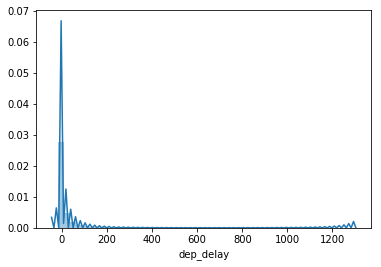

In [5]:
import seaborn as sns
%matplotlib inline
sns.distplot(flights_df['dep_delay']);

* As we can see, our data has some large outliers -- we're going to remove these from our analysis so they don't bias the model

In [6]:
flights_df['dep_delay'].quantile(0.99)

191.0

* The 99th percentile is 191, so we'll remove anything above that

In [7]:
flights_df = flights_df.loc[flights_df['dep_delay'] < flights_df['dep_delay'].quantile(0.99)]

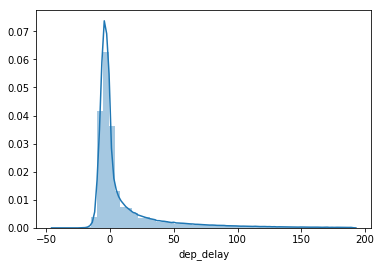

In [8]:
sns.distplot(flights_df['dep_delay'].dropna());

* Next, we're going to look at the data types of our possible feature variables

In [9]:
flights_df[[
    'month', 'day', 'sched_dep_time', 'sched_arr_time', 
    'carrier', 'origin', 'distance'
]].dtypes

month              int64
day                int64
sched_dep_time     int64
sched_arr_time     int64
carrier           object
origin            object
distance           int64
dtype: object

* We can see that all of our variables but two, `carrier` and `origin`, are of a numeric type

* This is good, because *linear regression requires numeric inputs*

<div class='question'>
    <strong>Question:</strong> What do we do with our quantitative variables?
</div>

#### Feature Engineering

* Feature engineering is the practice of using domain knowledge of the data to create features that make machine learning algorithms work

* Examples:
  * Making sure data are the correct types
  * Applying transfomation techniques
  * Combining features to account for interaction effects
  * Using domain knowledge to combine features in intelligent ways

* For now, we're just going to focus on making sure our data are the correct types -- and we need to convert `carrier` and `origin` to numeric variables

In [10]:
flights_df[['carrier', 'origin']].head()

,carrier,origin
0,UA,EWR
1,UA,LGA
2,AA,JFK
3,B6,JFK
4,DL,LGA


* There are a variety of ways we can **encode** our categorical variables into numeric variables: dummy encoding, target encoding, etc.

* We are going to focus on a form of dummy encoding called **one-hot encoding**

* One-hot encoding is the process of creating a binary/dummy variable for all but one of the possible categories within a categorical variable

* This will work because we have limited categories for our `carrier` and `origin` variables

In [11]:
flights_df[['carrier']].drop_duplicates().count()

carrier    16
dtype: int64

In [12]:
flights_df[['origin']].drop_duplicates().count()

origin    3
dtype: int64

* There's a one-hot encoding function called `get_dummies()` that's built into `pandas` because it's so popular

In [13]:
flights_df = pd.get_dummies(flights_df)
flights_df.head(3)

,dep_delay,month,day,sched_dep_time,sched_arr_time,distance,carrier_9E,carrier_AA,carrier_AS,carrier_B6,...,carrier_MQ,carrier_OO,carrier_UA,carrier_US,carrier_VX,carrier_WN,carrier_YV,origin_EWR,origin_JFK,origin_LGA
0,2.0,1,1,515,819,1400,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,4.0,1,1,529,830,1416,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,2.0,1,1,540,850,1089,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


* Note that there are many functionalities like this built into `sklearn`, but the `get_dummies()` function is really intuitive

#### Data Partitioning

* Next we need to partition our data into a **training** set and a **test**/**validation** set

<center>
<img src="images/train-test-split.png" alt="train-test-split.png" width="1000" height="1000">
</center>

<div class='question'>
    <strong>Question:</strong> Why might we want to split our data into two different sets?
</div>

* When an algorithm is *trained* on data to *learn* a function, it can learn *all* of the patterns in that data

* But some of that those patterns are just **noise** -- patterns that are random and specific to the data used to train the model

* This results in a biased model that doesn't generalize well to new data for which predictions are wanted -- this is called **overfitting**

##### Combatting Overfitting

* The reason we partition our data is to prevent overfitting

* We *train* the model on one data set, and then *test* or *validate* the model on another data set

<center>
<img src="images/train-test-split.png" alt="train-test-split.png" width="1000" height="1000">
</center>

* If the model predicts well on the test set that was not used to train it, it can be assumed that it generalizes well

##### Partitioning Data

* We can use the `train_test_split()` function from `sklearn`'s `model_selection` module to split our data frame into a training data set and a testing data set

In [14]:
from sklearn.model_selection import train_test_split
train_flights_df, test_flights_df = train_test_split(flights_df, test_size = 0.2)

* Notice that we *unpacked* the result via *multiple assignment* -- both `train_flights_df` and `test_flights_df` were assigned simultaneously

* We can verify that these train and test sets are the appropriate sizes

In [15]:
train_flights_df.shape

(260156, 25)

In [16]:
test_flights_df.shape

(65040, 25)

* And it's also a good idea to make sure there are similar distributions in the target variable

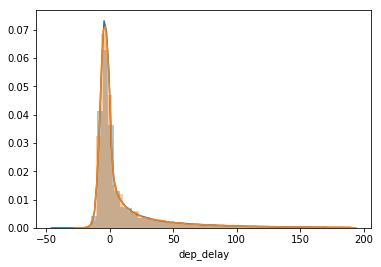

In [17]:
sns.distplot(train_flights_df['dep_delay'])
sns.distplot(test_flights_df['dep_delay']);

* Note that there are other forms of data partitioning (i.e. cross validation, k-fold, leave-one-out, etc.) that are useful and beneficial, but we don't have time to cover them here

### Training the Model

* Next we are actually going to train the model using `sklearn`

* This is where the model learns the actual patterns in the data

* First, let's import the `LinearRegression()` module

In [18]:
from sklearn.linear_model import LinearRegression

* We have to start by instantiating our `LinearRegression` object -- this is common practice in computer science

In [19]:
linear_model = LinearRegression()

* Next, we can split our target variable and features to feed into `linear_model`

In [20]:
train_flights_df_features = train_flights_df[[
    feature for feature in train_flights_df.columns if feature != 'dep_delay'
]]

In [21]:
train_flights_df_target = train_flights_df['dep_delay']

* Now we can train `linear_model` by calling the `fit()` method and passing in our data

In [22]:
linear_model.fit(X = train_flights_df_features, y = train_flights_df_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

* Now our model is built, and we need to validate it.

### Validating the Model

* There are many different ways to validate a linear regression that are specific to its statistical properties

* We are going to focus on algorithm-agnostic validation techniques that can be used on other algorithms

* Two common methods are to validate a supervised learning model are error metrics and variable-model relationships

#### Error Metrics

* There are a variety of error metics we can use to measure the performance of the predictive model

* Many of these focus on comparing the actual target values to the predicted target values

* We well use *root mean squared error* (RMSE) -- it's a common choice because:
  * It captures an average quantity of error
  * It more heavily penalizes really bad predictions

##### Calculating RMSE

* We will begin by importing the necessary functions -- we could do this by hand, but `sklearn` makes life easier

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt

* Next, we'll compute the RMSE for the training data -- this can serve as a benchmark to see if we overfit the data

In [24]:
train_rmse = sqrt(mean_squared_error(train_flights_df_target, linear_model.predict(train_flights_df_features)))
train_rmse

29.44694192377377

* Next we'll do the same for the test data, but we need to do the preprocessing again, as well

In [25]:
features = [feature for feature in test_flights_df.columns if feature != 'dep_delay']
features

['month',
 'day',
 'sched_dep_time',
 'sched_arr_time',
 'distance',
 'carrier_9E',
 'carrier_AA',
 'carrier_AS',
 'carrier_B6',
 'carrier_DL',
 'carrier_EV',
 'carrier_F9',
 'carrier_FL',
 'carrier_HA',
 'carrier_MQ',
 'carrier_OO',
 'carrier_UA',
 'carrier_US',
 'carrier_VX',
 'carrier_WN',
 'carrier_YV',
 'origin_EWR',
 'origin_JFK',
 'origin_LGA']

In [26]:
test_flights_df_features = test_flights_df[features]
test_flights_df_target = test_flights_df['dep_delay']

* And then we can compute the RMSE

In [27]:
test_rmse = sqrt(mean_squared_error(test_flights_df_target, linear_model.predict(test_flights_df_features)))
test_rmse

29.418625778782086

* We see there doesn't seem to be overfitting, which is a good

<div class='question'>
    <strong>Question:</strong> Is this RMSE good?
</div>

##### Comparing to Target

* It can be helpful to see how this RMSE (which can be thought of as a weighted average error), compares to the target variable's standard deviation

* This can help put into context reason relative magnitude of the error

In [28]:
print('Test RMSE:', test_rmse)
print('Test Target Standard Deviation', sqrt(test_flights_df_target.var()))

Test RMSE: 29.418625778782086
Test Target Standard Deviation 30.402740988518268


* In addition, it's very common to create a *predicted vs. actual* plot to visually see how each prediction compares to the actual

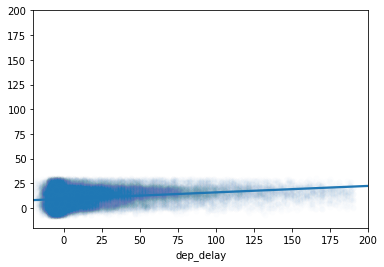

In [29]:
sns.scatterplot(test_flights_df_target, linear_model.predict(test_flights_df_features), alpha = 0.01).set(xlim = (-20, 200), ylim=(-20, 200))
sns.regplot(test_flights_df_target, linear_model.predict(test_flights_df_features), scatter = False);

* While there is a slight directional impact, this model is not very predictive

* That's okay, modeling is an iterative project -- there are ways to improve, and the best thing to do is look at your data

#### Variable Considerations

* For a linear regression, each feature has a trained **coefficient** a representation of how it impacts the prediction

* It will helpful to know which coefficients impact our predictions -- let's make a function to do this

In [30]:
def get_coefficients(columns, model_object):
    '''Function to sort get the sorted coefficients of a linear model'''
    import operator
    dictionary = dict(zip(columns, model_object.coef_))
    return sorted(dictionary.items(), key = operator.itemgetter(1))

In [31]:
get_coefficients(test_flights_df_features.columns, linear_model)

[('carrier_HA', -5.024815739460589),
 ('carrier_OO', -5.013481219972503),
 ('carrier_US', -4.876963105981786),
 ('carrier_AS', -4.396407494035699),
 ('carrier_DL', -2.6499254599289146),
 ('carrier_AA', -1.8226280559678953),
 ('carrier_MQ', -0.851679609252267),
 ('origin_LGA', -0.7980088476985722),
 ('month', -0.18108683463541128),
 ('origin_JFK', -0.15373973126704601),
 ('distance', 4.270932279014476e-05),
 ('sched_arr_time', 0.0004706440877615519),
 ('day', 0.01051170534353567),
 ('sched_dep_time', 0.01415764467567412),
 ('carrier_VX', 0.1950698557639116),
 ('carrier_UA', 0.3224753159849816),
 ('carrier_B6', 0.6548721481048339),
 ('origin_EWR', 0.9517485789656012),
 ('carrier_YV', 1.6293107949794012),
 ('carrier_9E', 2.0760697777764467),
 ('carrier_FL', 3.668612879664457),
 ('carrier_F9', 3.7650953564847973),
 ('carrier_WN', 5.495586844487545),
 ('carrier_EV', 6.828807711353314)]

<div class='question'>
    <strong>Question:</strong> Are there any feature coefficients here that are surprising?
</div>

* I would think that the month would be more predictive -- why isn't it?

* Month is an integer *data type* from 1-12 -- does the weather follow a constant change pattern from months 1-12?

* We can likely make our model more predictive by treating each month as a category and one-hot encoding it

In [32]:
flights_df['month'] = flights_df['month'].astype(str)
flights_df = pd.get_dummies(flights_df)
flights_df.head()

,dep_delay,day,sched_dep_time,sched_arr_time,distance,carrier_9E,carrier_AA,carrier_AS,carrier_B6,carrier_DL,...,month_11,month_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9
0,2.0,1,515,819,1400,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,1,529,830,1416,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1,540,850,1089,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.0,1,545,1022,1576,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,-6.0,1,600,837,762,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


* Then we can rebuild our model

In [33]:
train_flights_df, test_flights_df = train_test_split(flights_df, test_size = 0.2)
linear_model = LinearRegression()
features = [feature for feature in train_flights_df.columns if feature != 'dep_delay']
train_flights_df_features = train_flights_df[features]
train_flights_df_target = train_flights_df['dep_delay']
linear_model.fit(X = train_flights_df_features, y = train_flights_df_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

* And validate the results

In [34]:
train_rmse = sqrt(mean_squared_error(train_flights_df_target, linear_model.predict(train_flights_df_features)))
train_rmse

29.179510591133813

In [35]:
test_flights_df_features = test_flights_df[[feature for feature in test_flights_df.columns if feature != 'dep_delay']]
test_flights_df_target = test_flights_df['dep_delay']

In [36]:
test_rmse = sqrt(mean_squared_error(test_flights_df_target, linear_model.predict(test_flights_df_features)))
test_rmse

29.179034243828475

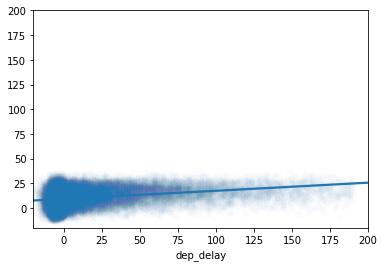

In [37]:
sns.scatterplot(test_flights_df_target, linear_model.predict(test_flights_df_features), alpha = 0.01).set(xlim = (-20, 200), ylim=(-20, 200))
sns.regplot(test_flights_df_target, linear_model.predict(test_flights_df_features), scatter = False);

* Our results got marginally better, but a lot more could be done

<div class='question'>
    <strong>Question:</strong> What else could we do to improve our predictions?
</div>

* More feature engineering (day/night flights, day-of-week, holidays, etc.)

* Collect more data (weather *forecast*, incoming flight information\*, estimated security times, plane capacity, number of passengers, plane manufacturer and model, etc.)

* Choose a different algorithm...

* Keep doing these things...and know when to stop

## Learning More

* Firstly, **don't feel intimated** -- you're not going to learn this in an hour

* There are a lot of things you can do to improve your skills

* Books
  * *Introduction to Statistical Learning* or *Elements of Statistical Learning*, Hastie, Tibshirani, and Friedman
  * *Python Data Science Handbook*, Jake VanderPlas
  * *Hands-on Machine Learning with scikit-learn and TensorFlow*, Aurélien Géron

* Online Courses
  * Machine Learning with Python - Coursera

* Practice
  * Use your own data
  * Kaggle

## Questions

Are there any questions before moving on?